Winemag kaggle'da python eğitimlerinde kullanılan bir veriseti. İçerisinde şaraba dair bilgiler içeriyor. işte şarabın üretildiği ülke, üreticisi, puanı, fiyatı, vilayeti, şarap hakkında açıklama vs. şeklinde 130k'ya aşkın veri var.

In [1]:
# dahil edeceğimiz kütüphaneler:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# warningleri durduralım
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', '{:.0f}'.format)  # Sets the decimal precision for numbers.
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed.
pd.set_option('display.max_rows', None)  # Ensures all rows are displayed.

In [2]:
# verimizi dahil edelim

winemag = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
df = winemag.copy()
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Veriyi tanıyalım

In [3]:
# data'nın özelliklerine bakalım
print(f"""
data shape: {df.shape},
data size: {df.size}
""")


data shape: (129971, 13),
data size: 1689623



In [4]:
# data üzerinde genel bilgi edinelim

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [5]:
# sayısal verilerin describini görelim

df.describe().T

,count,mean,std,min,25%,50%,75%,max
points,129971,88,3,80,86,88,91,100
price,120975,35,41,4,17,25,42,3300


In [6]:
# şimdi de object verilerin describine bakalım

df.describe(include= "object").T

,count,unique,top,freq
country,129908,43,US,54504
description,129971,119955,"Seductively tart in lemon pith, cranberry and ...",3
designation,92506,37979,Reserve,2009
province,129908,425,California,36247
region_1,108724,1229,Napa Valley,4480
region_2,50511,17,Central Coast,11065
taster_name,103727,19,Roger Voss,25514
taster_twitter_handle,98758,15,@vossroger,25514
title,129971,118840,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,11
variety,129970,707,Pinot Noir,13272


In [7]:
# sütun isimlerini değiştirelim

df.rename(columns = {"country": "ulke",
                    "description": "sarap_acıklaması",
                    "designation": "gosterim",
                    "points": "puanlama",
                    "price": "fiyat",
                    "province": "vilayet",
                    "region_1": "bolge_1",
                    "region_2": "bolge_2",
                    "taster_name": "tadimci_adi",
                    "taster_twitter_handle": "tadimci_twitter",
                    "title": "baslik",
                    "variety": "sarap_turu",
                    "winery": "saraphane"}, inplace = True)

In [8]:
# bazı gereksiz alanları siliyoruz.

df = df.drop(["bolge_2", "baslik"], axis = 1)

In [9]:
# boş değerleri gözlemleyelim

pd.DataFrame({
                'Count':df.shape[0],
                'Column':df.shape[1],
                'Size':df.size,
                'Null':df.isnull().sum(),
                'Null %':df.isnull().mean() * 100,
                'Not-Null':df.notnull().sum(),
                'Unique':df.nunique(),
                'Duplicated':df.duplicated().sum()
})

,Count,Column,Size,Null,Null %,Not-Null,Unique,Duplicated
ulke,129971,11,1429681,63,0,129908,43,9984
sarap_acıklaması,129971,11,1429681,0,0,129971,119955,9984
gosterim,129971,11,1429681,37465,29,92506,37979,9984
puanlama,129971,11,1429681,0,0,129971,21,9984
fiyat,129971,11,1429681,8996,7,120975,390,9984
vilayet,129971,11,1429681,63,0,129908,425,9984
bolge_1,129971,11,1429681,21247,16,108724,1229,9984
tadimci_adi,129971,11,1429681,26244,20,103727,19,9984
tadimci_twitter,129971,11,1429681,31213,24,98758,15,9984
sarap_turu,129971,11,1429681,1,0,129970,707,9984


### kayıp verileri doldurma işlemi

In [10]:
#ülke sütunu için unique değer gözlemleme
df.ulke.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [11]:
df[df.ulke.isnull()].head()

,ulke,sarap_acıklaması,gosterim,puanlama,fiyat,vilayet,bolge_1,tadimci_adi,tadimci_twitter,sarap_turu,saraphane
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30,NaN,NaN,Mike DeSimone,@worldwineguys,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,Roger Voss,@vossroger,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18,NaN,NaN,Mike DeSimone,@worldwineguys,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28,NaN,NaN,Susan Kostrzewa,@suskostrzewa,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28,NaN,NaN,Jeff Jenssen,@worldwineguys,Chardonnay,Ross-idi


In [12]:
df[(df.sarap_turu) == "Chinuri"]

,ulke,sarap_acıklaması,gosterim,puanlama,fiyat,vilayet,bolge_1,tadimci_adi,tadimci_twitter,sarap_turu,saraphane
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30,NaN,NaN,Mike DeSimone,@worldwineguys,Chinuri,Gotsa Family Wines
39239,Georgia,Whiffs of smoke and sea breeze entice on the n...,Chardakhi White Dry With Skin Contact Unfiltered,87,18,Georgia,NaN,Anna Lee C. Iijima,NaN,Chinuri,Iago's Wine
110970,Georgia,"Honey gold in color, this wine made from an in...",Dry Unfiltered,84,28,Georgia,NaN,Mike DeSimone,@worldwineguys,Chinuri,Gotsa Family Wines


In [13]:
# ülke sütunundaki verileri şarap türünü baz alarak dolduralım
def fill_country(row, df):
    if pd.isna(row['ulke']):  # Eğer ülke sütunu boşsa
        same_var = df[df['sarap_turu'] == row['sarap_turu']]  # Aynı şarap türündeki satırları seç
        list_country = same_var['ulke'].dropna().unique()  # Benzersiz dolu ülkeleri al
        if len(list_country) == 1:  # Eğer tek bir benzersiz ülke varsa
            return list_country[0]  # O ülkeyi döndür
    return row['ulke']  # Değilse orijinal değeri döndür

# Apply ile her satır için işlemi gerçekleştir
df['ulke'] = df.apply(lambda row: fill_country(row, df), axis=1)

In [14]:
df[(df.sarap_turu) == "Chinuri"]

,ulke,sarap_acıklaması,gosterim,puanlama,fiyat,vilayet,bolge_1,tadimci_adi,tadimci_twitter,sarap_turu,saraphane
913,Georgia,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30,NaN,NaN,Mike DeSimone,@worldwineguys,Chinuri,Gotsa Family Wines
39239,Georgia,Whiffs of smoke and sea breeze entice on the n...,Chardakhi White Dry With Skin Contact Unfiltered,87,18,Georgia,NaN,Anna Lee C. Iijima,NaN,Chinuri,Iago's Wine
110970,Georgia,"Honey gold in color, this wine made from an in...",Dry Unfiltered,84,28,Georgia,NaN,Mike DeSimone,@worldwineguys,Chinuri,Gotsa Family Wines


In [15]:
df["ulke"].fillna("Unspecified", inplace = True)

In [16]:
# gösterim sütunu için bos değer analizi

df.gosterim.unique()

array(['Vulkà Bianco', 'Avidagos', nan, ...,
       'Gimblett Gravels Merlot-Cabernet Sauvignon-Malbec', 'Irongate',
       'Lieu-dit Harth Cuvée Caroline'], dtype=object)

In [17]:
df[df.gosterim.isnull()].head()

,ulke,sarap_acıklaması,gosterim,puanlama,fiyat,vilayet,bolge_1,tadimci_adi,tadimci_twitter,sarap_turu,saraphane
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Gris,Rainstorm
7,France,This dry and restrained wine offers spice in p...,NaN,87,24,Alsace,Alsace,Roger Voss,@vossroger,Gewürztraminer,Trimbach
11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30,Alsace,Alsace,Roger Voss,@vossroger,Gewürztraminer,Leon Beyer
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34,California,Alexander Valley,Virginie Boone,@vboone,Cabernet Sauvignon,Louis M. Martini
14,US,Building on 150 years and six generations of w...,NaN,87,12,California,Central Coast,Matt Kettmann,@mattkettmann,Chardonnay,Mirassou


In [18]:
df["gosterim"].fillna("Unspecified", inplace = True)

In [19]:
# fiyat sütunu için boş değer analizi 

df["fiyat"].sample(5)

12388    13
78449    40
507      28
107581   30
35956    60
Name: fiyat, dtype: float64

In [20]:
# fiyat gözlem

print(f"price mean: {df.fiyat.mean()}\nprice median: {df.fiyat.median()}")

price mean: 35.363389129985535
price median: 25.0


In [21]:
df["fiyat"].fillna(df.fiyat.median(), inplace = True)

In [22]:
# vilayet sütunu için bos deger analizi

df["vilayet"].sample(10)

59607         California
84909     Southern Italy
24136     Northern Spain
69530            Tuscany
64505         California
49709         California
16100           Bordeaux
112376        California
49728             Veneto
16770           Piedmont
Name: vilayet, dtype: object

In [23]:
df["vilayet"].fillna("Unspecified", inplace = True)

In [24]:
# bolge_1 sütunu için unique değer gözlemleme
df.bolge_1.unique()

array(['Etna', nan, 'Willamette Valley', ..., 'Del Veneto',
       'Bardolino Superiore', 'Paestum'], dtype=object)

In [25]:
df["bolge_1"].fillna("Unspecified", inplace = True)

In [26]:
# sarap türü sütunu için bos değer analizi

pd.set_option('display.max_colwidth', 50) # None

df[df.sarap_turu.isnull()].head()

,ulke,sarap_acıklaması,gosterim,puanlama,fiyat,vilayet,bolge_1,tadimci_adi,tadimci_twitter,sarap_turu,saraphane
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",Unspecified,88,17,Maipo Valley,Unspecified,NaN,NaN,NaN,Carmen


In [27]:
df[(df["ulke"] == "Chile") & (df["saraphane"] == "Carmen")]

,ulke,sarap_acıklaması,gosterim,puanlama,fiyat,vilayet,bolge_1,tadimci_adi,tadimci_twitter,sarap_turu,saraphane
382,Chile,"With its herbal, traditional aromas, this New ...",Estate Grown Reserve,88,15,Maipo Valley,Unspecified,Michael Schachner,@wineschach,Cabernet Sauvignon,Carmen
868,Chile,"Composed berry, spice, herb and oak aromas are...",Gran Reserva,90,15,Colchagua Valley,Unspecified,Michael Schachner,@wineschach,Carmenère,Carmen
2924,Chile,Dusty apple aromas are less citrusy than ideal...,Unspecified,84,10,Curicó Valley,Unspecified,Michael Schachner,@wineschach,Sauvignon Blanc,Carmen
10801,Chile,Tropical fruit and hay aromas open this plump ...,Wave Series Left Wave,85,10,Leyda Valley,Unspecified,Michael Schachner,@wineschach,Sauvignon Blanc,Carmen
11102,Chile,"A blend of 50% Cabernet Sauvignon, 20% Grande ...",Winemaker's Reserve,91,40,Maipo Valley,Unspecified,NaN,NaN,Red Blend,Carmen
12435,Chile,"This smells a bit green, with aromas of herb, ...",Gran Reserva Maipo Alto,87,15,Maipo Valley,Unspecified,Michael Schachner,@wineschach,Petite Sirah,Carmen
20460,Chile,Briary raspberry and tomato aromas open this l...,Wave Series Right Wave,85,12,Leyda Valley,Unspecified,Michael Schachner,@wineschach,Pinot Noir,Carmen
22893,Chile,"Dry, leafy and herbal, with cherry, berry and ...",Reserva,88,20,Maipo Valley,Unspecified,Michael Schachner,@wineschach,Carmenère-Cabernet Sauvignon,Carmen
23553,Chile,"Racy and tight-bodied red wine, with a straine...",Unspecified,84,10,Rapel Valley,Unspecified,Michael Schachner,@wineschach,Carmenère,Carmen
25936,Chile,"This smells a bit green, with aromas of herb, ...",Gran Reserva Maipo Alto,87,15,Maipo Valley,Unspecified,Michael Schachner,@wineschach,Petite Sirah,Carmen


In [28]:
df["sarap_turu"].fillna("Petite Syrah", inplace = True)

In [29]:
# tadımcı_adı ve twitter sütunlarında bos değer analizi

df["tadimci_adi"].fillna("Unspecified", inplace = True)
df["tadimci_twitter"].fillna("Unspecified", inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ulke              129971 non-null  object 
 1   sarap_acıklaması  129971 non-null  object 
 2   gosterim          129971 non-null  object 
 3   puanlama          129971 non-null  int64  
 4   fiyat             129971 non-null  float64
 5   vilayet           129971 non-null  object 
 6   bolge_1           129971 non-null  object 
 7   tadimci_adi       129971 non-null  object 
 8   tadimci_twitter   129971 non-null  object 
 9   sarap_turu        129971 non-null  object 
 10  saraphane         129971 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 11.9+ MB


### veri görselleştirme kısmı

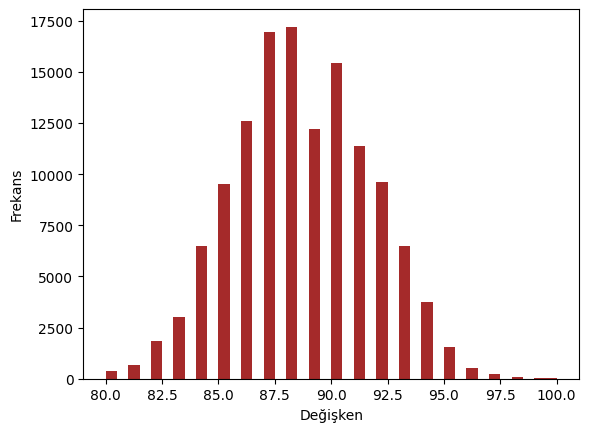

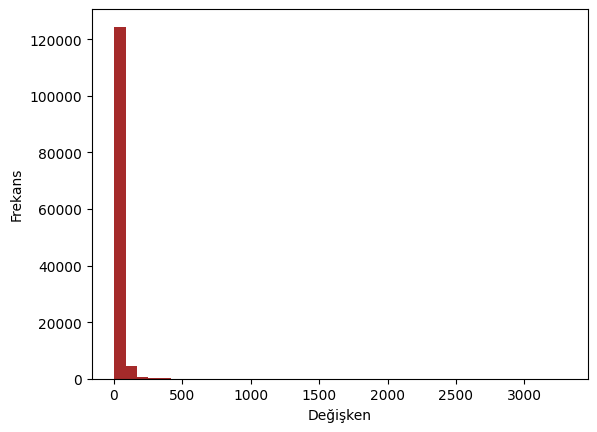

In [31]:
# sayısal değerlerdeki frekans dengesini kontrol edelim.
def plotHistogram(x):
    plt.figure()
    plt.hist(df[x], bins=40, color="brown")
    plt.xlabel("Değişken")
    plt.ylabel("Frekans")

numerical_value = ["puanlama", "fiyat"]
for i in numerical_value:
    plotHistogram(i)

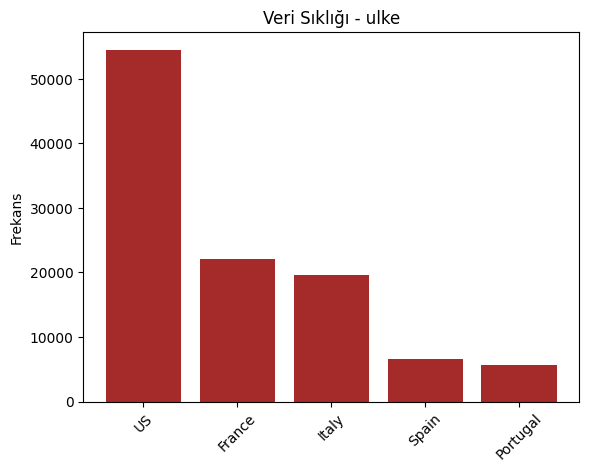

ulke: 
 ulke
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
Name: count, dtype: int64


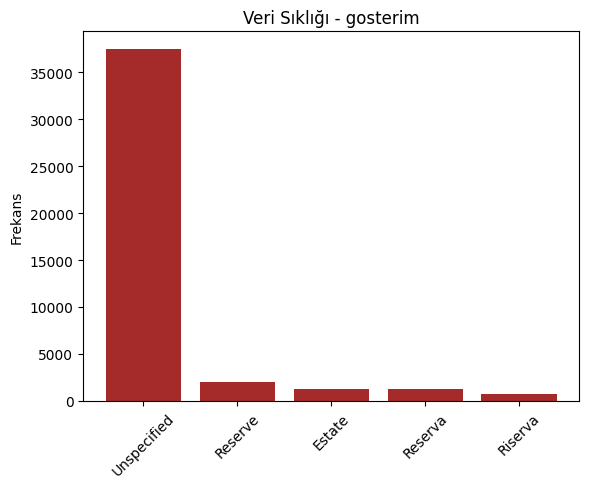

gosterim: 
 gosterim
Unspecified    37465
Reserve         2009
Estate          1322
Reserva         1259
Riserva          698
Name: count, dtype: int64


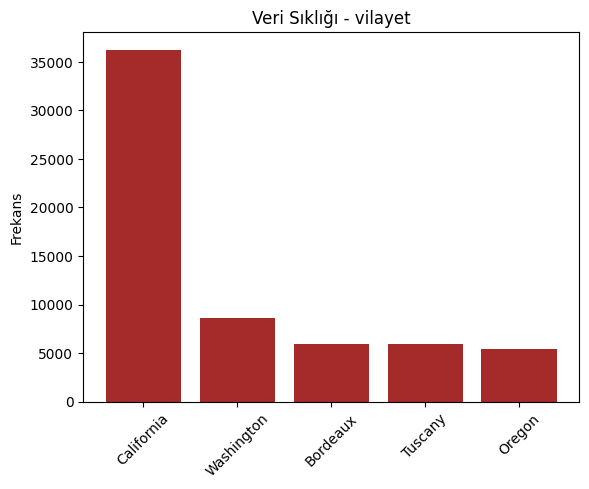

vilayet: 
 vilayet
California    36247
Washington     8639
Bordeaux       5941
Tuscany        5897
Oregon         5373
Name: count, dtype: int64


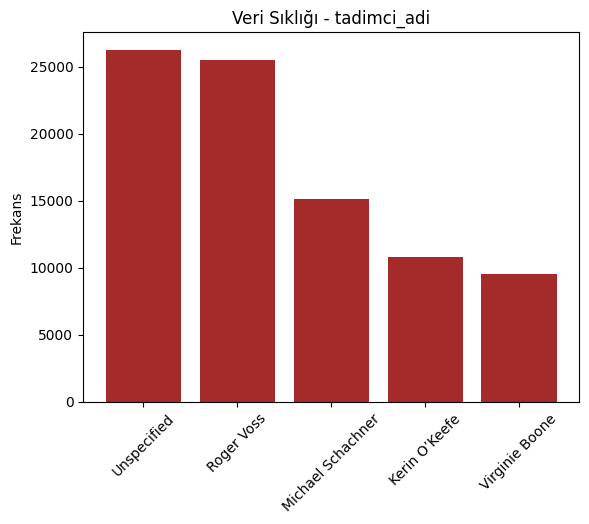

tadimci_adi: 
 tadimci_adi
Unspecified          26244
Roger Voss           25514
Michael Schachner    15134
Kerin O’Keefe        10776
Virginie Boone        9537
Name: count, dtype: int64


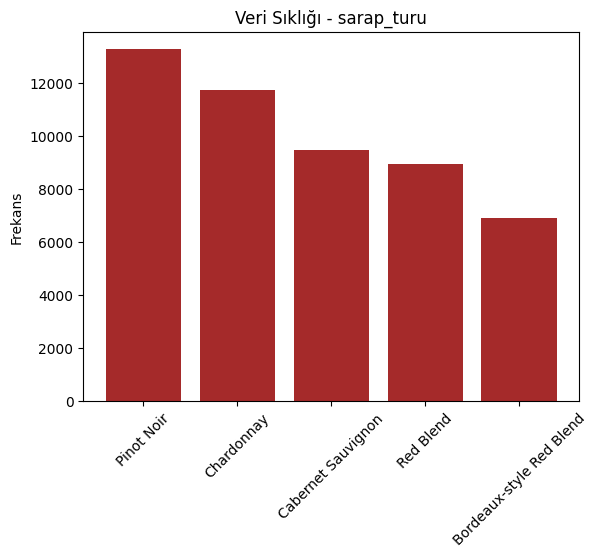

sarap_turu: 
 sarap_turu
Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Name: count, dtype: int64


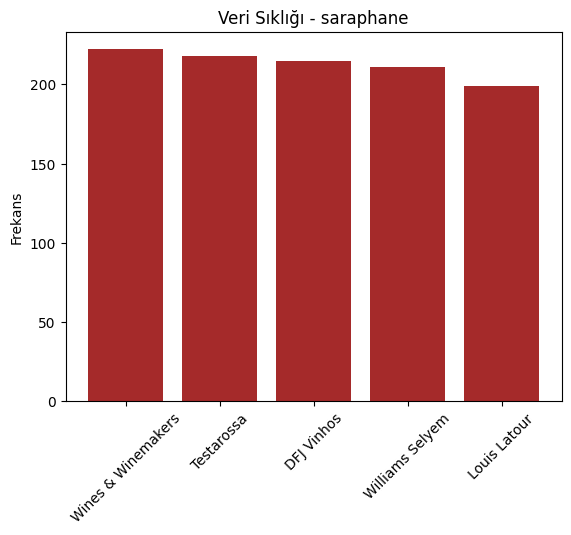

saraphane: 
 saraphane
Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
Name: count, dtype: int64


In [32]:
# kategorik verilerdeki değerlerin frekansları

def plotBar(x, n = 5):
    df_ = df[x]
    df_count = df_.value_counts()
    df_count = df_count[:n]
    plt.figure()
    plt.bar(df_count.index, df_count, color = "brown")
    plt.xticks(df_count.index, df_count.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title(f"Veri Sıklığı - {x}")
    plt.show()
    print(f"{x}: \n {df_count}")

categoric_values = ["ulke", "gosterim", "vilayet", "tadimci_adi" ,"sarap_turu", "saraphane"]
for i in categoric_values:
    plotBar(i)

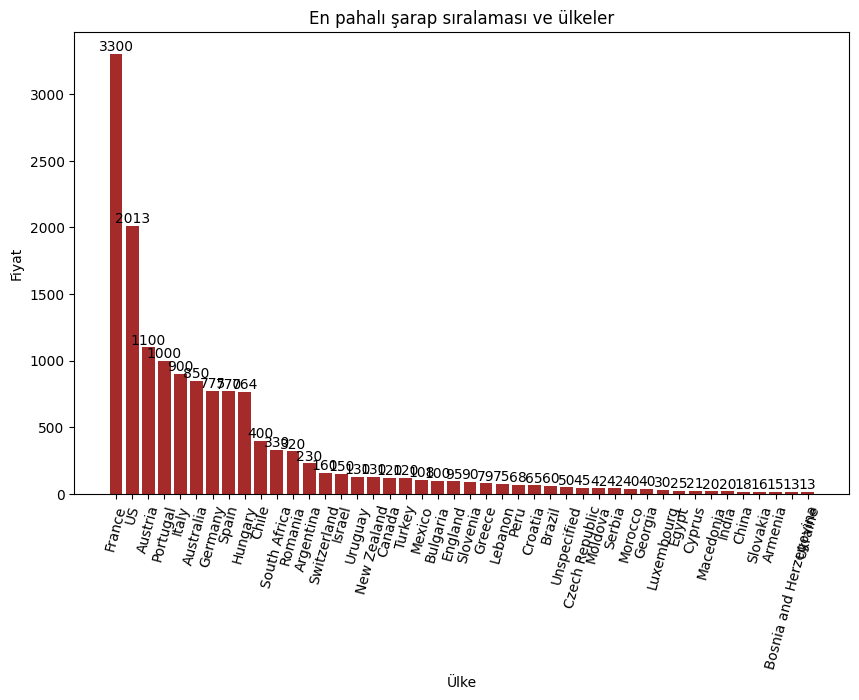

In [33]:
# şarap fiyatına göre ülke değerlendirmesi
# price_sort = df["fiyat"].value_counts().sort_index(ascending=False).head(10)

price_sorted = df.sort_values(by = "fiyat", ascending=False).drop_duplicates(subset='ulke')

plt.figure(figsize=(10, 6))
bars = plt.bar(price_sorted['ulke'], price_sorted['fiyat'], color='brown')
plt.xlabel('Ülke')
plt.ylabel('Fiyat')
plt.title('En pahalı şarap sıralaması ve ülkeler')
plt.xticks(rotation=75)

for bar in bars:
    yval = bar.get_height()  # Çubuğun yüksekliği (fiyat)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1,  # Konum
             f'{yval:.0f}', ha='center', va='bottom',fontsize=10, color='black')
plt.show()

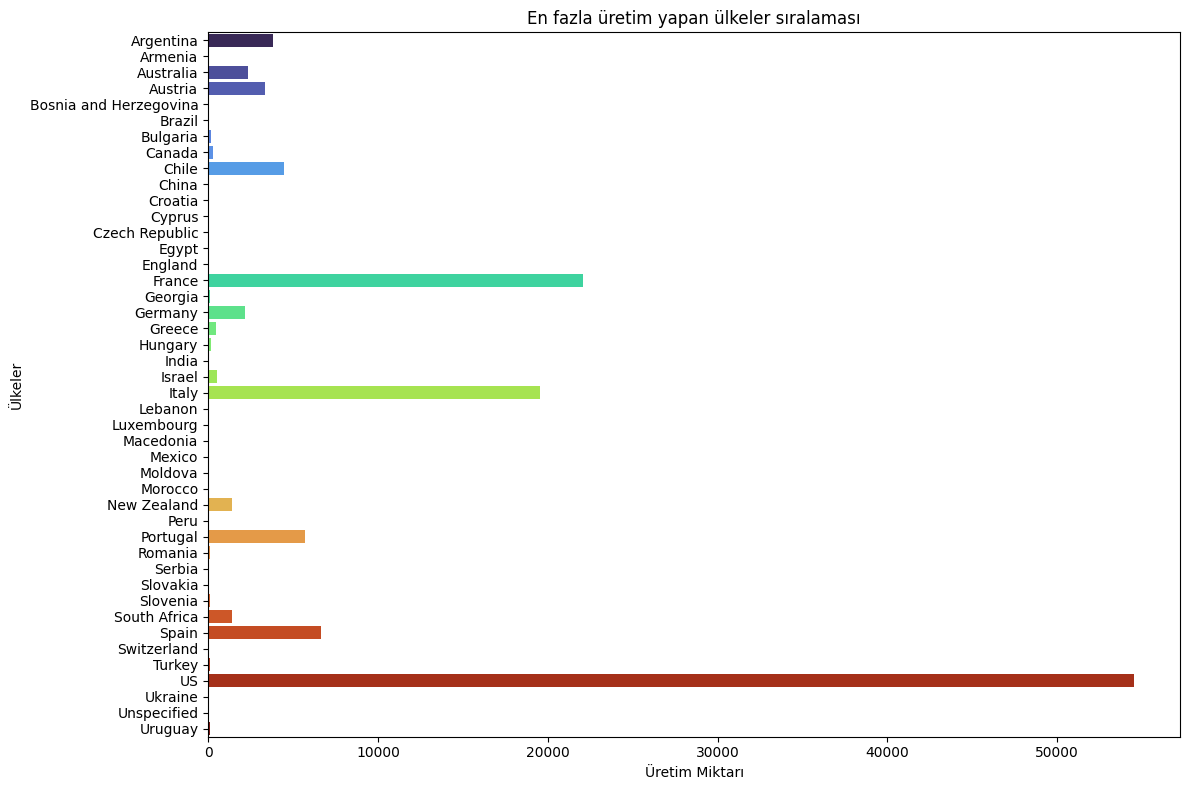

In [34]:
# en çok hangi ülkenin üretim yaptığını gözlemleyelim

count_country = df['ulke'].value_counts().sort_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(x=count_country.values, y=count_country.index, palette="turbo")
plt.xlabel("Üretim Miktarı")
plt.ylabel("Ülkeler")
plt.title("En fazla üretim yapan ülkeler sıralaması")
plt.tight_layout()
plt.show()

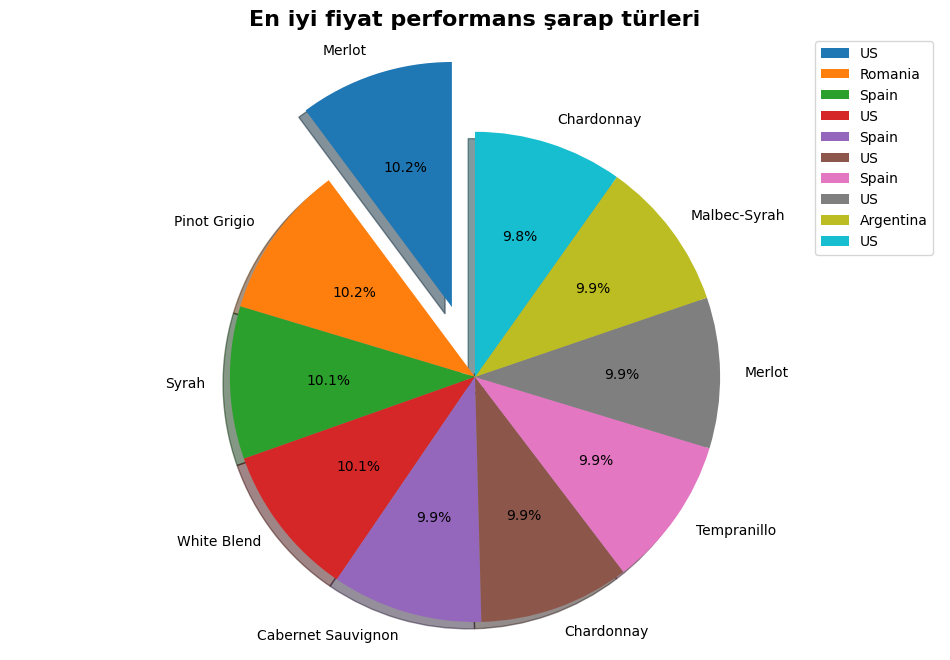

In [35]:
# en iyi fiyat performans ürününü tespit edelim

df["f/p_orani"] = df["puanlama"] / df["fiyat"]

fp_deg = df.sort_values(by="f/p_orani", ascending=False)[:10]

fig, ax = plt.subplots(figsize=(12, 8))

ax.pie(fp_deg["f/p_orani"], labels=fp_deg["sarap_turu"] ,autopct='%1.1f%%', startangle=90,
       explode=(0.3, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0), 
       shadow = 0.1, 
       textprops={'fontsize': 10})

ax.set_title('En iyi fiyat performans şarap türleri', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.legend(labels=fp_deg["ulke"])
plt.show()

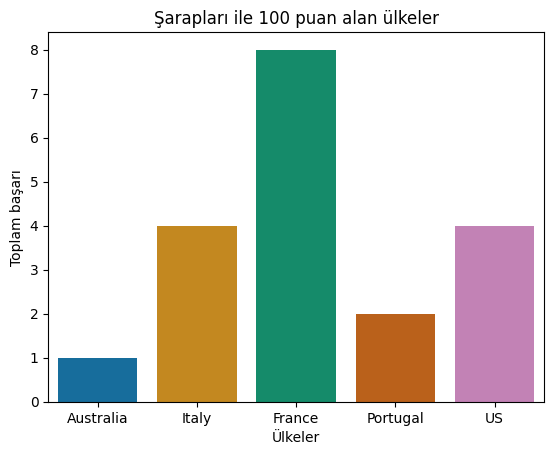

In [60]:
# 100 puan alan şarapları tespit ederek en iyileri bulalım
best_wines = df[(df["puanlama"] == 100)]
sns.countplot(x = best_wines["ulke"], palette="colorblind")

plt.xlabel("Ülkeler")
plt.ylabel("Toplam başarı")
plt.title("Şarapları ile 100 puan alan ülkeler")
plt.show()

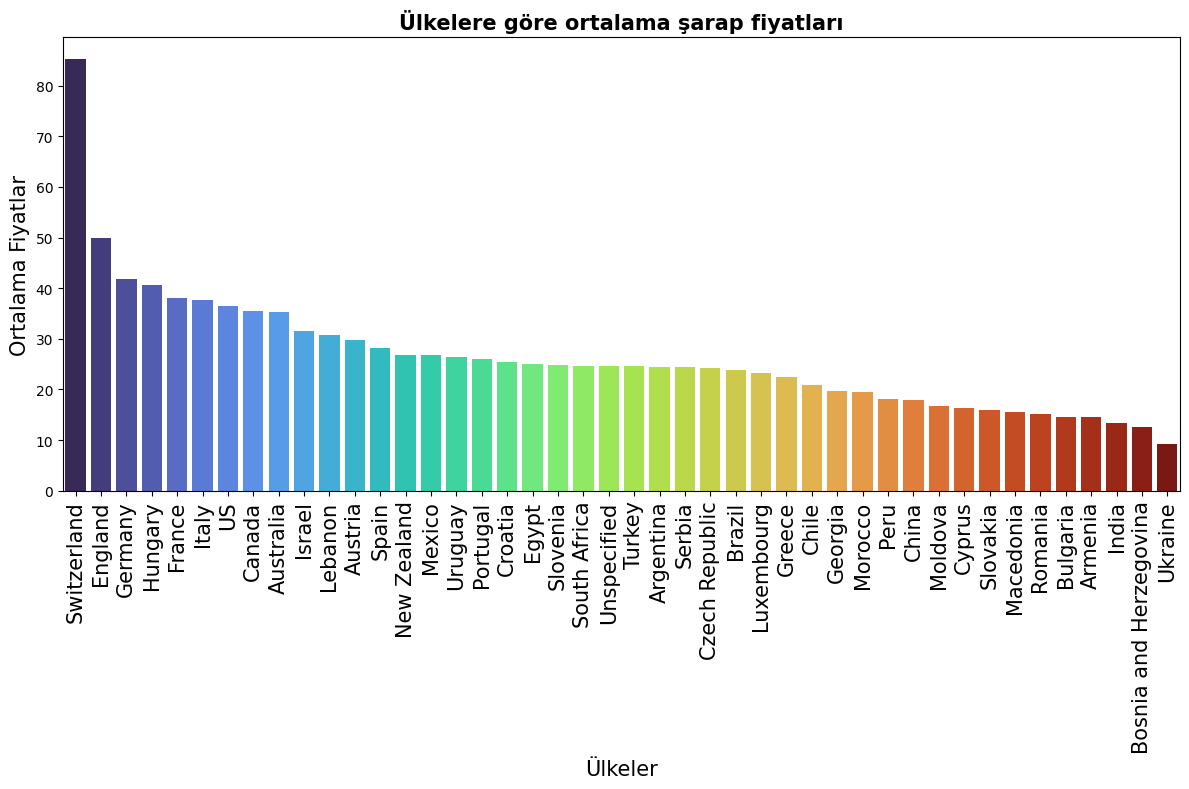

In [81]:
# tüm veride ortalama şarap fiyatlarını tespit ederek pahalı ve ucuz satan ülkeleri bulalaım

find_expensive_wine = df.groupby('ulke', as_index=False).agg({'fiyat': 'mean'}).sort_values(by="fiyat", ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x = find_expensive_wine["ulke"], y =find_expensive_wine["fiyat"], palette="turbo")
plt.xlabel("Ülkeler", fontsize=15)
plt.ylabel("Ortalama Fiyatlar", fontsize=15)
plt.title("Ülkelere göre ortalama şarap fiyatları", fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

In [90]:
# son olarak ülke bazında toplam puan, ortalama puan ve ülke sayısını gözlemleyeceğimiz bir groupby yapısı kuralım
pd.set_option('display.max_columns', None)  # Tüm sütunları göster
pd.set_option('display.width', 1000) 

ulke_fiyat_deg = df.groupby('ulke', as_index=False).agg({'puanlama': ['mean', 'sum', 'count', 'max', 'min']})
ulke_fiyat_deg.columns = ['Ülkeler', 'Ortalama puan', 'Toplam puan', 'Kayıt sayısı', 'Max puan', 'Min puan']
print(ulke_fiyat_deg)


                   Ülkeler  Ortalama puan  Toplam puan  Kayıt sayısı  Max puan  Min puan
0                Argentina             87       329499          3800        97        80
1                  Armenia             88          175             2        88        87
2                Australia             89       206304          2329       100        80
3                  Austria             90       301844          3350        98        82
4   Bosnia and Herzegovina             86          173             2        88        85
5                   Brazil             85         4403            52        89        80
6                 Bulgaria             88        12399           141        91        80
7                   Canada             89        22968           257        94        82
8                    Chile             86       386799          4472        95        80
9                    China             89           89             1        89        89
10                 Cr